In [69]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


Importing data

In [70]:
df = pd.read_csv("../input/nlp-getting-started/train.csv")
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [71]:
data = df['text']
data.shape

(7613,)

In [72]:
labels = df['target']
labels.shape

(7613,)

In [73]:
cls = np.unique(labels,return_counts=True)
cls

(array([0, 1]), array([4342, 3271]))

Bar plot of value counts for both the classes.

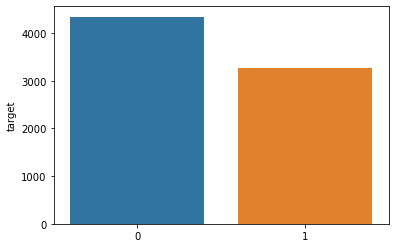

In [74]:
from matplotlib import pyplot as plt
import seaborn as sns
dt = df['target'].value_counts()
chart = sns.barplot(x = dt.index,y = dt)
plt.show()

Importing test data.

In [75]:
test_data = pd.read_csv('../input/nlp-getting-started/test.csv')
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [76]:
test_data.shape

(3263, 4)

In [77]:
x_test = test_data['text']

Cleaning the data by removing uncessary words.

In [79]:
import nltk
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [81]:
tokenizer = RegexpTokenizer(r'[a-z]\w+')
ps = PorterStemmer()
sw = set(stopwords.words('english'))

In [82]:
def cleaned_text(text):
    text = text.lower()
    text = text.replace("<br /><br />"," ")
    tokenized_text = tokenizer.tokenize(text)
    filtered_text = [words for words in tokenized_text if words not in sw]
    stemmed_text = [ps.stem(word) for word in filtered_text]
    cleaned_text = ' '.join(stemmed_text)
    return cleaned_text

In [83]:
x_train = list(data)
x_test = list(x_test)

In [86]:
x_train = [cleaned_text(i) for i in x_train]
x_train[:10]

['deed reason earthquak may allah forgiv us',
 'forest fire near la rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect',
 'peopl receiv wildfir evacu order california',
 'got sent photo rubi alaska smoke wildfir pour school',
 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir',
 'flood disast heavi rain caus flash flood street manit colorado spring area',
 'top hill see fire wood',
 'emerg evacu happen build across street',
 'afraid tornado come area']

In [87]:
x_test = [cleaned_text(i) for i in x_test]
x_test[:10]

['happen terribl car crash',
 'heard earthquak differ citi stay safe everyon',
 'forest fire spot pond gees flee across street cannot save',
 'apocalyps light spokan wildfir',
 'typhoon soudelor kill china taiwan',
 'shake earthquak',
 'probabl still show life arsen yesterday eh eh',
 'hey',
 'nice hat',
 'fuck']

Count vectorizer transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))


In [89]:
vocab = cv.fit_transform(x_train)
x_train = vocab.toarray()
x_test = cv.transform(x_test)
x_test = x_test.toarray()
print(x_train.shape)
print(x_test.shape)

(7613, 70491)
(3263, 70491)


In [90]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, roc_curve, precision_recall_curve, auc

Splitting data into training and validation data.

In [91]:
x_train,val_x,y_train,val_y = train_test_split(x_train,labels,test_size=0.3,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(val_x.shape)
print(val_y.shape)

(5329, 70491)
(5329,)
(2284, 70491)
(2284,)


Predictions through logistic regression.

Results on training data:

Accuracy = 0.9919309438919122
Precision = 0.9919489523469399
Recall = 0.9919309438919122

Results on validation data:

Accuracy = 0.8209281961471103
Precision = 0.8230780206003571
Recall = 0.8209281961471103


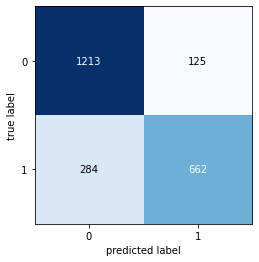

In [100]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_tr1 = lr.predict(x_train)
pred1 = lr.predict(val_x)

conf_matrix = confusion_matrix(val_y,pred1)
plot_confusion_matrix(conf_matrix)

precision = precision_score(val_y,pred1,average='weighted')
recall = recall_score(val_y, pred1,average='weighted')

print("Results on training data:\n")
print("Accuracy = "+str(accuracy_score(y_train, pred_tr1)))
print("Precision = "+str(precision_score(y_train,pred_tr1,average='weighted')))
print("Recall = "+str(recall_score(y_train,pred_tr1,average='weighted')))

print()

print("Results on validation data:\n")
print("Accuracy = "+str(accuracy_score(val_y, pred1)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))
        



Predictions through mutlinomial naive bayes.

Results on training data:

Accuracy = 0.9742916119346969
Precision = 0.9743125441815697
Recall = 0.9742916119346969

Results on validation data:

Accuracy = 0.7985989492119089
Precision = 0.7986622274084477
Recall = 0.7985989492119089


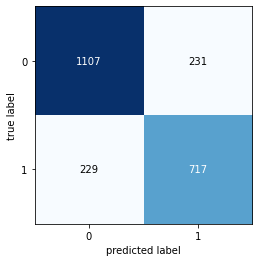

In [101]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train,y_train)

pred_tr2 = mnb.predict(x_train)
pred2 = mnb.predict(val_x)

conf_matrix = confusion_matrix(val_y,pred2)
plot_confusion_matrix(conf_matrix)

precision = precision_score(val_y,pred2,average='weighted')
recall = recall_score(val_y, pred2,average='weighted')

print("Results on training data:\n")
print("Accuracy = "+str(accuracy_score(y_train, pred_tr2)))
print("Precision = "+str(precision_score(y_train,pred_tr2,average='weighted')))
print("Recall = "+str(recall_score(y_train,pred_tr2,average='weighted')))

print()

print("Results on validation data:\n")
print("Accuracy = "+str(accuracy_score(val_y, pred2)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))
        



Predictions through gaussian naive bayes.

Results on training data:

Accuracy = 0.9742916119346969
Precision = 0.9743125441815697
Recall = 0.9742916119346969

Results on validation data:

Accuracy = 0.7985989492119089
Precision = 0.7986622274084477
Recall = 0.7985989492119089


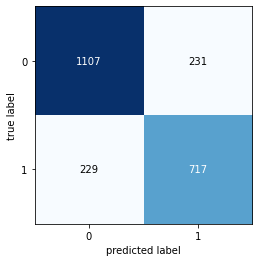

In [103]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

pred_tr3 = mnb.predict(x_train)
pred3 = mnb.predict(val_x)

conf_matrix = confusion_matrix(val_y,pred3)
plot_confusion_matrix(conf_matrix)

precision = precision_score(val_y,pred3,average='weighted')
recall = recall_score(val_y, pred3,average='weighted')

print("Results on training data:\n")
print("Accuracy = "+str(accuracy_score(y_train, pred_tr3)))
print("Precision = "+str(precision_score(y_train,pred_tr3,average='weighted')))
print("Recall = "+str(recall_score(y_train,pred_tr3,average='weighted')))

print()

print("Results on validation data:\n")
print("Accuracy = "+str(accuracy_score(val_y, pred3)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))
        


Predictions through random forest classifier.

Results on training data:

Accuracy = 0.9968099080502909
Precision = 0.9968098241072487
Recall = 0.9968099080502909

Results on validation data:

Accuracy = 0.7889667250437828
Precision = 0.8144449683416408
Recall = 0.7889667250437828


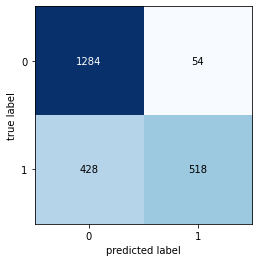

In [104]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred4 = rfc.predict(val_x)
pred_tr4 = rfc.predict(x_train)
conf_matrix = confusion_matrix(val_y,pred4)
plot_confusion_matrix(conf_matrix)

precision = precision_score(val_y,pred4,average='weighted')
recall = recall_score(val_y, pred4,average='weighted')

print("Results on training data:\n")
print("Accuracy = "+str(accuracy_score(y_train, pred_tr4)))
print("Precision = "+str(precision_score(y_train,pred_tr4,average='weighted')))
print("Recall = "+str(recall_score(y_train,pred_tr4,average='weighted')))

print()

print("Results on validation data:\n")
print("Accuracy = "+str(accuracy_score(val_y,pred4)))
print("Precision = "+str(precision))
print("Recall = "+str(recall))
        

Making predictions on test data

In [96]:
test_pred = lr.predict(x_test)
test_pred = np.array(test_pred)

In [98]:
df = pd.DataFrame({'id':test_data['id'],
                   'target':test_pred})

df.to_csv("./predictions.csv",index=None)

 **Accuracy given by different models:-**
* Logistic regression-82%
* Multinomial naive bayes-79.8%
* Gaussian naive bayes-79.8
* Random Forest-78.8%